In [5]:
#Importing required package.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# from sklearn.linear_modelimport SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

import random
from sklearn import datasets, linear_model

import seaborn as sns

In [6]:
#Loading dataset
horse = pd.read_csv("horse.csv")

In [7]:
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [8]:
label_quality = LabelEncoder()

In [9]:
horse.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [10]:
horse['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

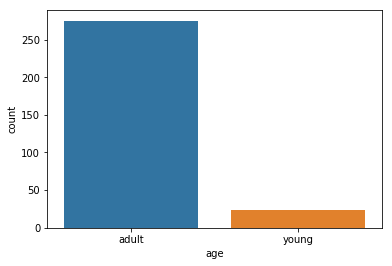

In [11]:
sns.countplot(horse['age'])

In [12]:
#Now separate the dataset as response variable and feature variables
X = horse.drop('hospital_number', axis =1)
y = horse['hospital_number']

In [13]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#Applying Standard scaling to get optimized result

sc = StandardScaler()



In [15]:
X_train[:30]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
6,yes,adult,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,mild_pain,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
183,no,adult,38.2,68.0,32.0,warm,increased,bright_pink,less_3_sec,alert,...,43.0,65.0,NaN,NaN,lived,no,0,0,0,no
185,yes,adult,39.3,64.0,90.0,warm,reduced,normal_pink,less_3_sec,NaN,...,39.0,6.7,NaN,NaN,lived,yes,21110,0,0,no
146,no,adult,38.0,44.0,12.0,warm,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.5,NaN,NaN,died,yes,2209,0,0,no
30,no,adult,37.7,96.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,...,66.0,7.5,NaN,NaN,died,yes,4205,0,0,no
22,yes,adult,38.6,42.0,34.0,warm,normal,pale_cyanotic,NaN,depressed,...,48.0,7.2,NaN,NaN,lived,yes,3111,0,0,no
254,yes,young,38.8,184.0,84.0,normal,NaN,normal_pink,less_3_sec,severe_pain,...,33.0,3.3,NaN,NaN,died,yes,7111,0,0,no
56,yes,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,6.7,NaN,NaN,lived,yes,3112,0,0,no
237,no,adult,36.1,88.0,NaN,cool,reduced,pale_pink,less_3_sec,mild_pain,...,45.0,7.0,serosanguious,4.8,euthanized,yes,2209,0,0,yes
285,no,adult,37.8,82.0,12.0,cool,normal,normal_pink,more_3_sec,severe_pain,...,50.0,7.0,NaN,NaN,euthanized,yes,2205,0,0,no


In [16]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [17]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [18]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
80 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.6 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [19]:
1 + np.nan

nan

In [20]:


pd.Series([1, np.nan, 2, None])



0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [21]:


df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df


,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [22]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [23]:
horse.dropna()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
10,yes,adult,528548,38.1,66.0,12.0,cool,reduced,bright_red,less_3_sec,...,44.0,6.0,cloudy,3.6,lived,yes,2124,0,0,yes
54,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,...,57.0,8.1,serosanguious,4.5,euthanized,yes,7400,0,0,yes
64,yes,adult,529667,39.0,64.0,36.0,cool,normal,pale_cyanotic,more_3_sec,...,44.0,7.5,serosanguious,5.0,lived,yes,2113,0,0,yes
91,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,...,57.0,8.1,serosanguious,4.5,died,yes,3205,0,0,yes
104,yes,adult,527563,37.8,52.0,24.0,normal,reduced,pale_pink,less_3_sec,...,48.0,6.6,clear,3.7,died,yes,5400,0,0,no
188,yes,adult,5299603,38.3,60.0,16.0,cool,normal,normal_pink,less_3_sec,...,30.0,6.0,clear,3.0,lived,yes,31110,0,0,no


In [24]:
horse.head(2)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no


In [25]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [26]:
random.seed(300)
training,testing = train_test_split(horse, test_size = 0.25 )
print(training.shape)
print(testing.shape)

(224, 28)
(75, 28)


In [27]:
regr = linear_model.LinearRegression()
training_data = training.drop('surgery', axis=1)
training_test = training.iloc[:,-1]
print(training_data.shape)
print(training_test.shape)

(224, 27)
(224,)


In [28]:
testing_data = testing.loc[:,['age','rectal_temp', 'pulse', 'repiratory_rate']]
testing_test = testing[['surgery']].as_matrix()


/home/aasenomad/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/aasenomad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [29]:
horse.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [30]:
horse.ix[[5,10,15]]

/home/aasenomad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
10,yes,adult,528548,38.1,66.0,12.0,cool,reduced,bright_red,less_3_sec,...,44.0,6.0,cloudy,3.6,lived,yes,2124,0,0,yes
15,yes,adult,530233,37.6,96.0,48.0,cool,normal,pale_cyanotic,less_3_sec,...,45.0,6.8,NaN,NaN,died,yes,3207,0,0,no


In [31]:
horse[["surgery","outcome"]]

,surgery,outcome
0,no,died
1,yes,euthanized
2,no,lived
3,yes,died
4,no,died
5,no,lived
6,yes,lived
7,yes,died
8,no,euthanized
9,no,lived


In [32]:
horse.groupby("age").age.describe()

,count,unique,top,freq
age,,,,
adult,275,1,adult,275
young,24,1,young,24


In [33]:
horse.groupby("outcome").outcome.describe()

,count,unique,top,freq
outcome,,,,
died,77,1,died,77
euthanized,44,1,euthanized,44
lived,178,1,lived,178


In [34]:
horse.isnull().any()

surgery                  False
age                      False
hospital_number          False
rectal_temp               True
pulse                     True
respiratory_rate          True
temp_of_extremities       True
peripheral_pulse          True
mucous_membrane           True
capillary_refill_time     True
pain                      True
peristalsis               True
abdominal_distention      True
nasogastric_tube          True
nasogastric_reflux        True
nasogastric_reflux_ph     True
rectal_exam_feces         True
abdomen                   True
packed_cell_volume        True
total_protein             True
abdomo_appearance         True
abdomo_protein            True
outcome                  False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
dtype: bool

In [35]:
horse.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [36]:
horse["pulse"].isnull().sum()

24

In [37]:
modifiedHorse=horse.fillna("")

In [38]:
modifiedHorse.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [39]:
X_train[:30]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
6,yes,adult,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,mild_pain,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
183,no,adult,38.2,68.0,32.0,warm,increased,bright_pink,less_3_sec,alert,...,43.0,65.0,NaN,NaN,lived,no,0,0,0,no
185,yes,adult,39.3,64.0,90.0,warm,reduced,normal_pink,less_3_sec,NaN,...,39.0,6.7,NaN,NaN,lived,yes,21110,0,0,no
146,no,adult,38.0,44.0,12.0,warm,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.5,NaN,NaN,died,yes,2209,0,0,no
30,no,adult,37.7,96.0,30.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,...,66.0,7.5,NaN,NaN,died,yes,4205,0,0,no
22,yes,adult,38.6,42.0,34.0,warm,normal,pale_cyanotic,NaN,depressed,...,48.0,7.2,NaN,NaN,lived,yes,3111,0,0,no
254,yes,young,38.8,184.0,84.0,normal,NaN,normal_pink,less_3_sec,severe_pain,...,33.0,3.3,NaN,NaN,died,yes,7111,0,0,no
56,yes,adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,6.7,NaN,NaN,lived,yes,3112,0,0,no
237,no,adult,36.1,88.0,NaN,cool,reduced,pale_pink,less_3_sec,mild_pain,...,45.0,7.0,serosanguious,4.8,euthanized,yes,2209,0,0,yes
285,no,adult,37.8,82.0,12.0,cool,normal,normal_pink,more_3_sec,severe_pain,...,50.0,7.0,NaN,NaN,euthanized,yes,2205,0,0,no


In [40]:
horse.fillna(0)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,0,more_3_sec,...,45.0,8.4,0,0.0,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,0,0,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,0,0.0,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,0,0,dark_cyanotic,more_3_sec,...,74.0,7.4,0,0.0,died,no,4300,0,0,no
5,no,adult,528355,0.0,0.0,0.0,warm,normal,pale_pink,less_3_sec,...,0.0,0.0,0,0.0,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,0,0.0,lived,yes,3124,0,0,no
7,yes,adult,529607,0.0,60.0,0.0,cool,0,0,less_3_sec,...,44.0,8.3,0,0.0,died,yes,2208,0,0,no
8,no,adult,530051,0.0,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,0,0.0,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,0.0,normal,0,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [2]:
horse['respiratory_rate']

NameError: name 'horse' is not defined

In [42]:
horse.to_csv("Jonathan.csv")

In [43]:
values = horse.dropna(subset=["age"])

In [46]:
horse.sum()

surgery                  noyesnoyesnonoyesyesnonoyesnoyesnoyesyesyesnoy...
age                      adultadultadultyoungadultadultadultadultadulty...
hospital_number                                                  325232078
rectal_temp                                                         9122.3
pulse                                                                19800
respiratory_rate                                                      7341
nasogastric_reflux_ph                                                249.5
packed_cell_volume                                                   12503
total_protein                                                         6457
abdomo_protein                                                         307
outcome                  diedeuthanizedliveddieddiedlivedliveddiedeutha...
surgical_lesion          nononoyesnonoyesyesyesnoyesyesnonoyesyesnonoye...
lesion_1                                                           1094253
lesion_2                 

In [1]:
plt.figure(figsize=(12, 8))
sb.heatmap(horese.isnull())
plt.show()

NameError: name 'plt' is not defined